# Постановка задачи

Производители хлопьев стремятся выпускать более сбалансированные и полезные составы, чтобы повысить рейтинг своей продукции.

Ниже предоставлены данные о разных видах хлопьев от различных производителей: калорийность, содержание белков, жиров, сахара, клетчатки, витаминов и другие параметры, а также рейтинг каждого продукта, отражающий его общую ценность.

Задача: выявить, какие характеристики хлопьев наиболее сильно влияют на их рейтинг.

# Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Загрузка данных

In [3]:
df = pd.read_excel('6_cereal.xlsx', sheet_name="in")

In [4]:
df.head()

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,1.0,0.75,34.384843


# Описание данных

Признаки: 
- name - имя продукта
- manufacturer - производитель продукта
- type - тип употребления продукта
- calories - содержание калорий в продукте 
- protein - содержание белка в продукте (г)
- fat - содержание жиров в продукте (г)
- sodium - содержание натрия в продукте (мг)
- fiber - содержание клетчатки в продукте (г)
- carbo - содержание углеводов в продукте (г)
- sugars - количество сахаров в продукте (г)
- potass - содержание калия в продукте (г)
- vitamins - процентное соотношение витаминов от суточной нормы
- weight - вес продукта (унции)
- cups - объём продукта в чашках
- rating - оценка продукта

In [5]:
df.shape

(77, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          77 non-null     object 
 1   manufacturer  77 non-null     object 
 2   type          77 non-null     object 
 3   calories      77 non-null     int64  
 4   protein       77 non-null     int64  
 5   fat           77 non-null     int64  
 6   sodium        77 non-null     int64  
 7   fiber         77 non-null     float64
 8   carbo         77 non-null     float64
 9   sugars        77 non-null     int64  
 10  potass        77 non-null     int64  
 11  vitamins      77 non-null     int64  
 12  weight        77 non-null     float64
 13  cups          77 non-null     float64
 14  rating        77 non-null     float64
dtypes: float64(5), int64(7), object(3)
memory usage: 9.2+ KB


In [7]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000,93.704912


In [8]:
df.describe(include="O")

,name,manufacturer,type
count,77,77,77
unique,77,7,2
top,100% Bran,Kelloggs,Cold
freq,1,23,74


В наборе данных содержатся 77 наблюдений и 15 признаков. Пропущенных значений не обнаружено. Аномальные значения присутствуют в признаках sugars, potass и carbo, а именно значения -1 как минимальное количество содержимого в продукте. Все продукты уникальны, нет повторяющихся.

# Разведочный анализ данных (EDA)

### Проверка на пропущенные и дублирующие значения

In [9]:
df.isna().sum()

name            0
manufacturer    0
type            0
calories        0
protein         0
fat             0
sodium          0
fiber           0
carbo           0
sugars          0
potass          0
vitamins        0
weight          0
cups            0
rating          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

Все записи уникальны, нет дублирующихся и пустых значений.

## Одномерный разведочный анализ

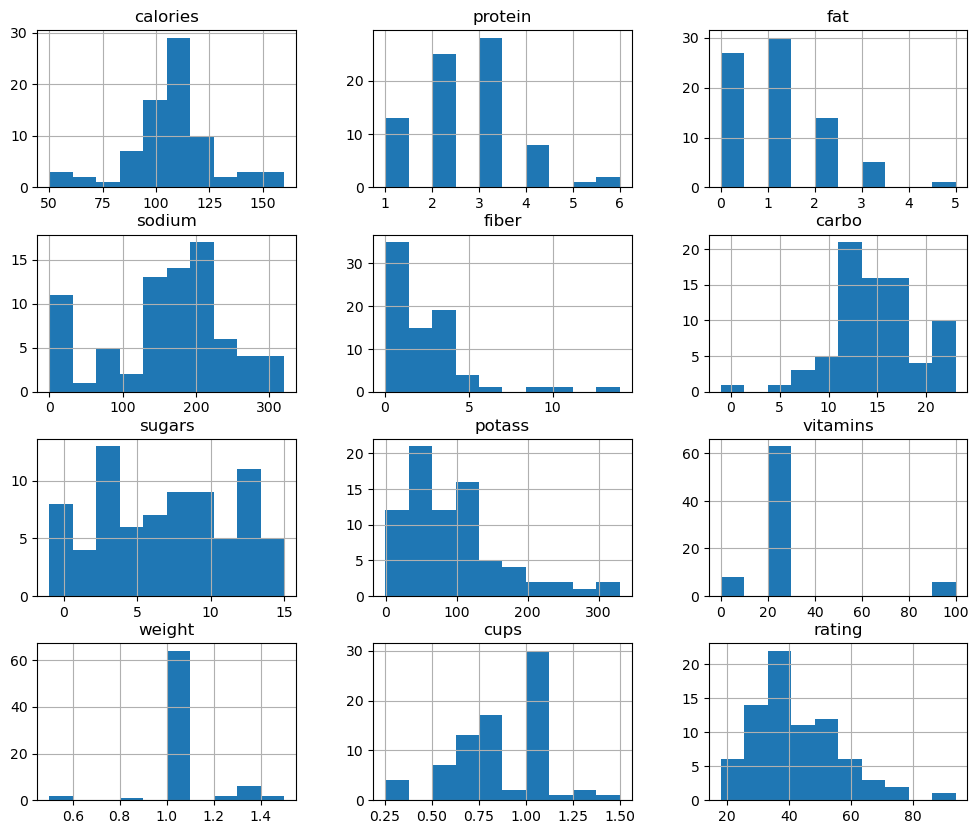

In [11]:
df.hist(figsize=(12, 10))
plt.show()

In [12]:
df["manufacturer"].value_counts()

manufacturer
Kelloggs                       23
General Mills                  22
Post                            9
Ralston Purina                  8
Quaker Oats                     8
Nabisco                         6
American Home Food Products     1
Name: count, dtype: int64

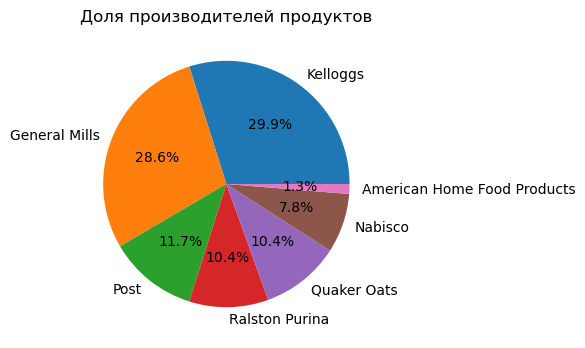

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(df["manufacturer"].value_counts(), labels=df["manufacturer"].value_counts().index, autopct='%1.1f%%')
plt.title("Доля производителей продуктов")
plt.show()

In [14]:
df["type"].value_counts(normalize=True)

type
Cold    0.961039
Hot     0.038961
Name: proportion, dtype: float64

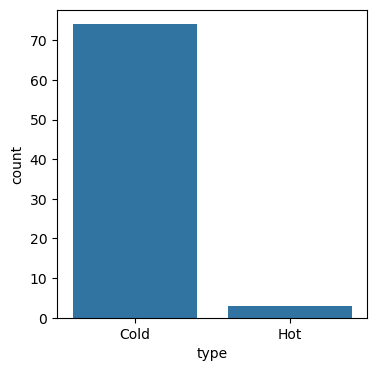

In [15]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x=df["type"])
plt.show()

In [16]:
df["vitamins"].value_counts()

vitamins
25     63
0       8
100     6
Name: count, dtype: int64

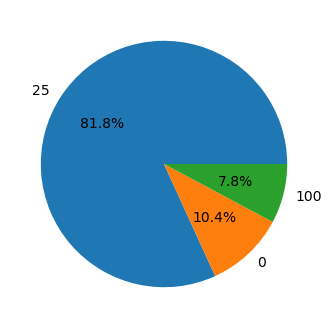

In [17]:
plt.figure(figsize=(4, 4))
plt.pie(df["vitamins"].value_counts(), labels=df["vitamins"].value_counts().index, autopct='%1.1f%%')
plt.show()

In [18]:
cols = ['carbo', 'sugars', 'potass']

normals = (df[cols] != -1).mean() * 100
normals

carbo     98.701299
sugars    98.701299
potass    97.402597
dtype: float64

In [19]:
anomalous = (df[cols] == -1).mean() * 100
anomalous

carbo     1.298701
sugars    1.298701
potass    2.597403
dtype: float64

Содержание аномальных значений невелико, но лучше заменить их, так как такие признаки не могу содержать отрицательные значения

In [20]:
median_carbo = df['carbo'][df['carbo'] != -1].median()
df['carbo'] = df['carbo'].replace(-1, median_carbo)

median_sugars = df['sugars'][df['sugars'] != -1].median()
df['sugars'] = df['sugars'].replace(-1, median_sugars)

median_potass = df['potass'][df['potass'] != -1].median()
df['potass'] = df['potass'].replace(-1, median_potass)

In [21]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.798701,7.025974,98.441558,28.246753,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881688,4.349755,69.491857,22.342523,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000,93.704912


### Вывод одномерного анализа

Одномерный анализ показал, что самым распространённым производителем является Kelloggs. Подавляющее большинство продуктов относится к категории холодных. Содержание витаминов в хлопьях принимает только три значения: 0%, 25% и 100% суточной норма. Из них преобладает 25% содержание. Заменили все аномальные значения признаков через их медианное значение.

## Двумерный разведочный анализ

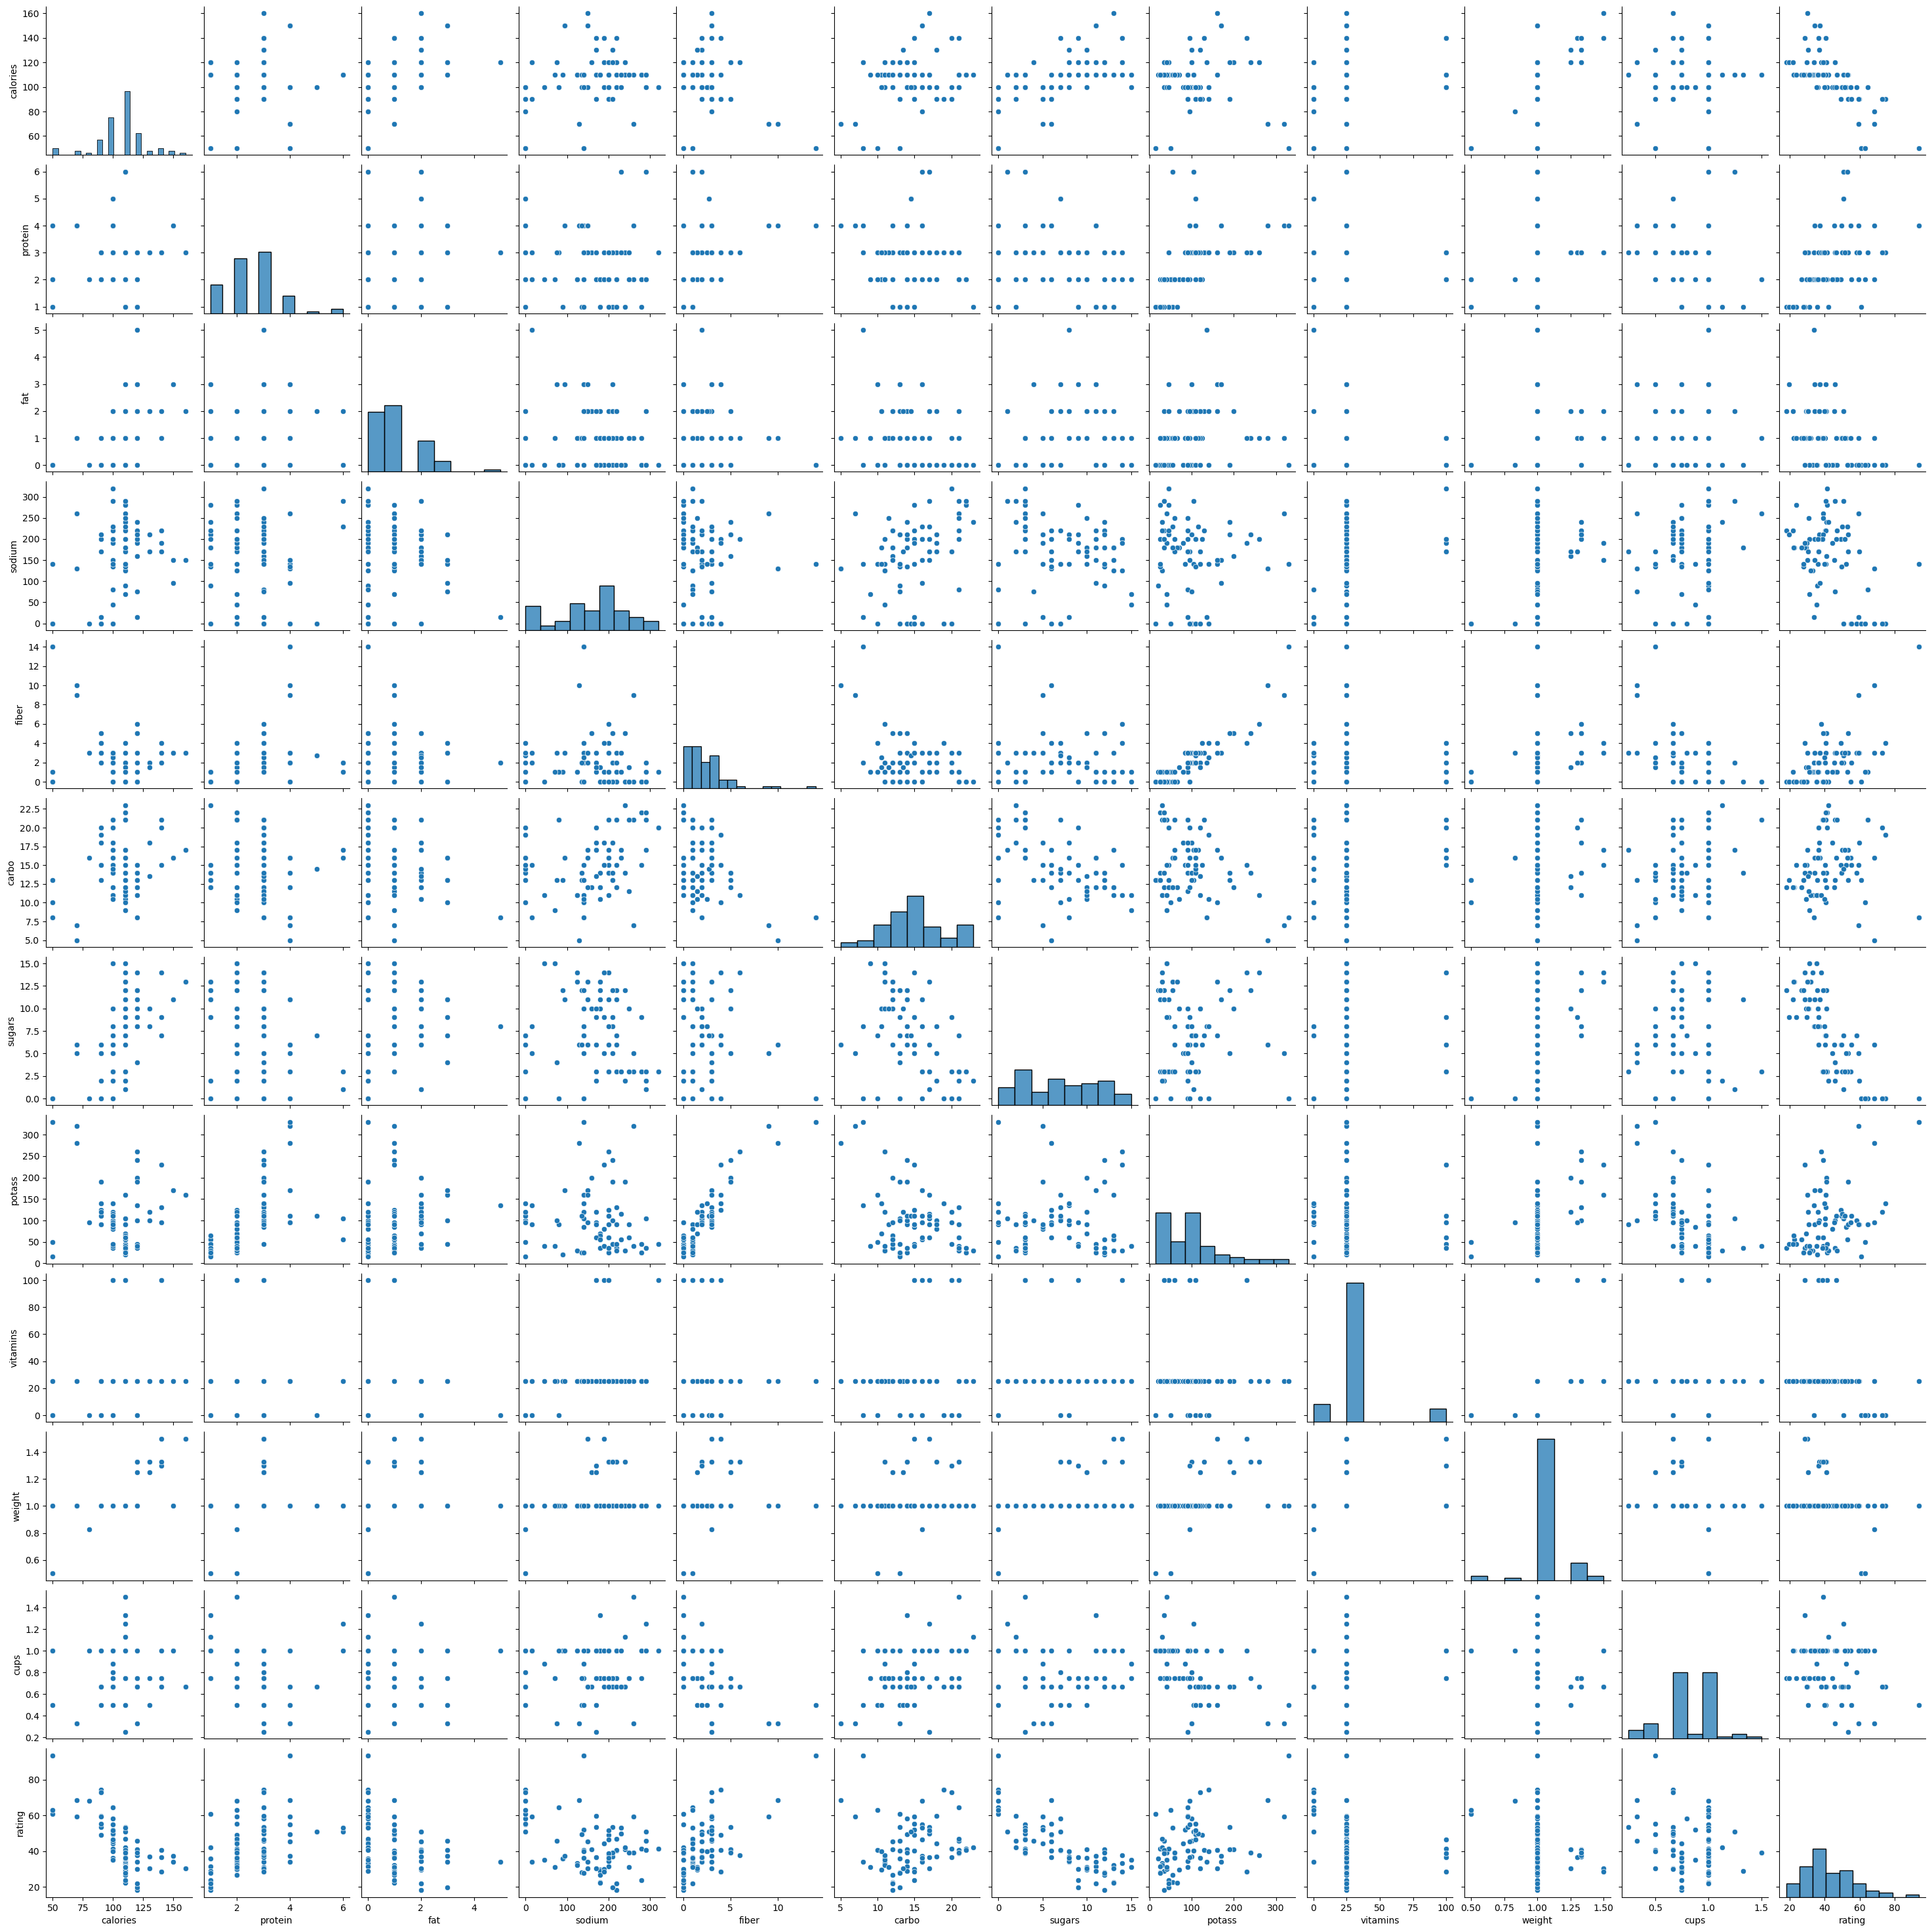

In [22]:
sns.pairplot(data=df)
plt.show()

In [23]:
df.columns

Index(['name', 'manufacturer', 'type', 'calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups',
       'rating'],
      dtype='object')

In [24]:
df_corr = df[['calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups',
       'rating']].corr()

df_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257776,0.566090,-0.071660,0.265356,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.026459,-0.282084,0.562168,0.007335,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.299068,0.300474,0.197826,-0.031156,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.292342,0.057577,-0.041533,0.361477,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380444,-0.138729,0.910052,-0.032243,0.247226,-0.513061,0.584160
carbo,0.257776,-0.026459,-0.299068,0.292342,-0.380444,1.000000,-0.471159,-0.360923,0.218142,0.138628,0.367078,0.087913
sugars,0.566090,-0.282084,0.300474,0.057577,-0.138729,-0.471159,1.000000,0.003618,0.097279,0.455741,-0.048772,-0.762227
potass,-0.071660,0.562168,0.197826,-0.041533,0.910052,-0.360923,0.003618,1.000000,-0.003054,0.420275,-0.499995,0.406651
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.218142,0.097279,-0.003054,1.000000,0.320324,0.128405,-0.240544
weight,0.696091,0.216158,0.214625,0.308576,0.247226,0.138628,0.455741,0.420275,0.320324,1.000000,-0.199583,-0.298124


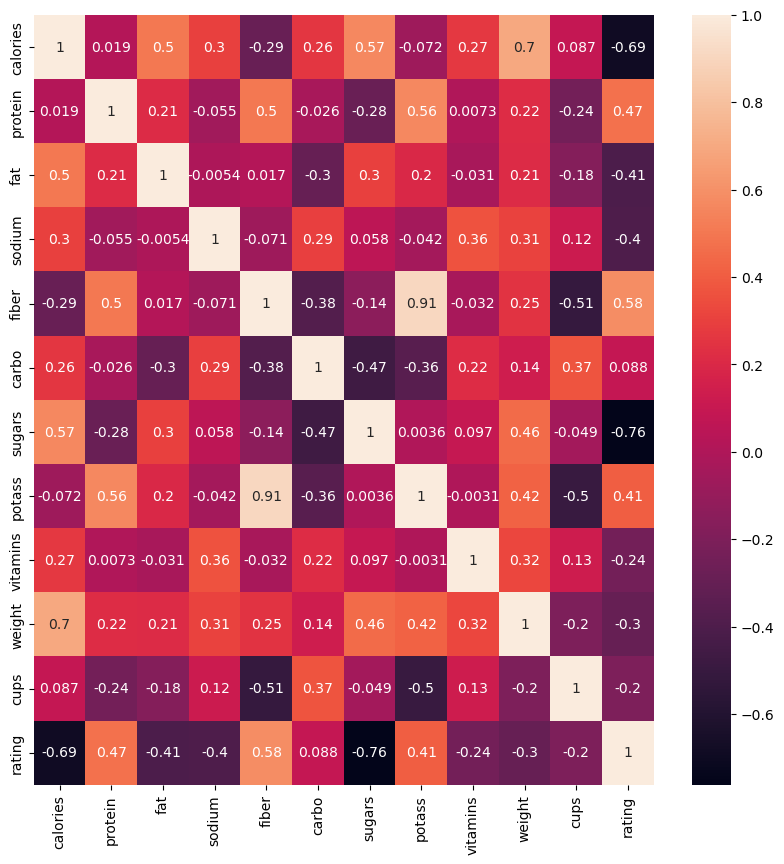

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot = True)
plt.show()

### Вывод 

Тепловая карта показала, что рейтинг имеет зависимость от признака fiber и признака protein. Чем выше содержание клетчатки и белка в хлопьях, тем выше их рейтинг. Также, тепловая карта показала признаки, которые негативно влияют на рейтинг: sugars, calories и fat. Чем выше содержание сахара, калорий и жиров в хлопьях, тем ниже их рейтинг.

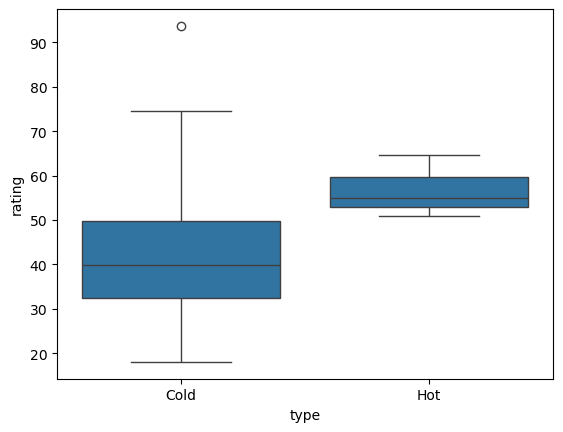

In [26]:
sns.boxplot(data=df, x='type', y='rating')
plt.show()

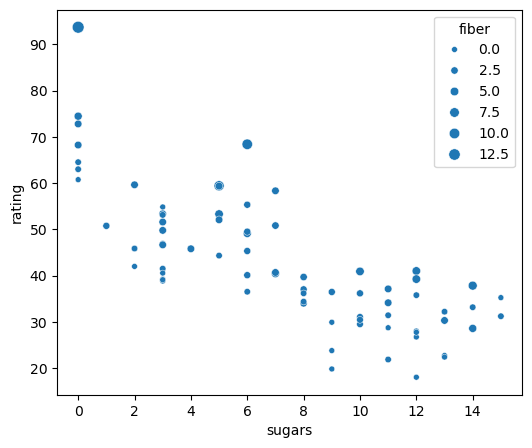

In [27]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='sugars',
    y='rating',
    size='fiber',
)
plt.show()

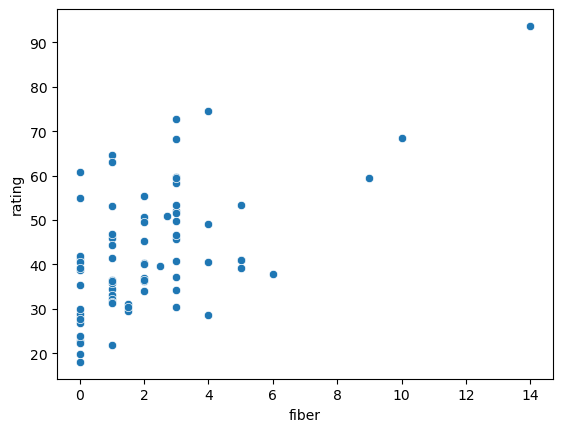

In [28]:
sns.scatterplot(data=df, x='fiber', y='rating')
plt.show()

### Вывод двумерного анализа

Двумерный анализ выявил сильную отрицательную связь рейтинга с содержанием сахара и положительную с клетчаткой. Наибольший рейтинг наблюдается у продуктов с низким сахаром и высоким содержанием клетчатки. Тип продукта не оказывает существенного влияния на рейтинг.

## Дополнительный анализ

In [29]:
df.nlargest(5, 'rating')[['name', 'fiber', 'sugars', 'protein', 'rating']]

,name,fiber,sugars,protein,rating
3,All-Bran with Extra Fiber,14.0,0,4,93.704912
64,Shredded Wheat 'n'Bran,4.0,0,3,74.472949
65,Shredded Wheat spoon size,3.0,0,3,72.801787
0,100% Bran,10.0,6,4,68.402973
63,Shredded Wheat,3.0,0,2,68.235885


### Вывод

Топ-5 хлопьев по рейтингу имеют высокое содержание клетчатки, низкое количество сахара (или отсутствует вовсе) и высокое содержание белка. Эти признаки являются ключевыми 

In [30]:
high_rating = df[df['rating'] > 60]
high_rating[['sugars', 'fiber', 'calories', 'protein']].mean()

sugars       0.75
fiber        4.50
calories    72.50
protein      2.75
dtype: float64

In [31]:
df.nlargest(3, 'fiber')[['name', 'fiber', 'rating']]

,name,fiber,rating
3,All-Bran with Extra Fiber,14.0,93.704912
0,100% Bran,10.0,68.402973
2,All-Bran,9.0,59.425505


In [32]:
len(df[df['sugars'] == 0])

7

In [33]:
len(df[df['fiber'] == 0])

19

In [34]:
no_sugar = df[df['sugars'] == 0].copy()
no_sugar[['name', 'manufacturer', 'rating']].sort_values('rating', ascending=False)

,name,manufacturer,rating
3,All-Bran with Extra Fiber,Kelloggs,93.704912
64,Shredded Wheat 'n'Bran,Nabisco,74.472949
65,Shredded Wheat spoon size,Nabisco,72.801787
63,Shredded Wheat,Nabisco,68.235885
20,Cream of Wheat (Quick),Nabisco,64.533816
55,Puffed Wheat,Quaker Oats,63.005645
54,Puffed Rice,Quaker Oats,60.756112


In [35]:
no_fiber = df[df['fiber'] == 0].copy()
no_fiber[['name', 'manufacturer', 'rating']].sort_values('rating', ascending=False)

,name,manufacturer,rating
54,Puffed Rice,Quaker Oats,60.756112
43,Maypo,American Home Food Products,54.850917
61,Rice Chex,Ralston Purina,41.998933
15,Corn Chex,Ralston Purina,41.445019
62,Rice Krispies,Kelloggs,40.560159
40,Kix,General Mills,39.241114
72,Triples,General Mills,39.106174
69,Total Corn Flakes,General Mills,38.839746
30,Golden Crisp,Post,35.252444
48,Nut&Honey Crunch,Kelloggs,29.924285


In [36]:
df.nlargest(3, 'sugars')[['name', 'sugars', 'rating']]

,name,sugars,rating
30,Golden Crisp,15,35.252444
66,Smacks,15,31.230054
6,Apple Jacks,14,33.174094


In [37]:
df.nlargest(3, 'fiber')[['name', 'fiber', 'rating']]

,name,fiber,rating
3,All-Bran with Extra Fiber,14.0,93.704912
0,100% Bran,10.0,68.402973
2,All-Bran,9.0,59.425505


### Вывод

Дополнительный анализ подтвердил, что самые высокие рейтинги получают хлопья без сахара или с очень низким его содержанием, особенно если они при этом богаты клетчаткой. Белок присутствует в лучших образцах, но не является главным фактором.

### Общий вывод

Анализ данных показал, что данное отношение не содержит пустых значений и дубликатов. Большее положительное влияние на рейтинг оказывают признаки fiber, protein и potass. Большее отрицательное влияние на рейтинг оказывают признаки sugars, calories и fat. Большинство топ-хлопьев по рейтингу содержат большое количество клетчатки, среднее или отсутствующее количество сахара и высокое количество белка. Изначально в отношении присутствовали аномальные значение в признаках sugars, potass и carbo. Доля аномальных значений относительно нормальных была мала, но для последующего анализа без учета таких значений было предпринято решение заменить их на медианное значение их признаков. Такие признаки как type (тип употребления) и carbo (углеводы) не влияют на рейтинг. Остальные признаки несущественно влияют на рейтинг.